In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# BLOB detector

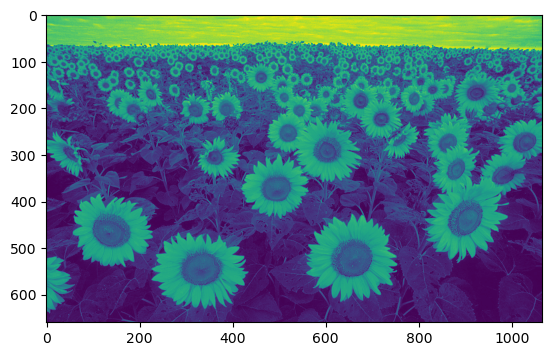

In [5]:
im = cv2.imread("images/himawari.jpg")[:, :, ::-1]
im = im.astype(float).mean(2) / 255
plt.imshow(im)

## Ex 8.1
Create the function im_scales = scaleSpaced(im, sigma, n), where im_scales is a list containing the scale space pyramid of the original image im. The width and height of all images in
the pyramid im_scales are exactly the same as the original image im. I.e. here we do the naïve
implementation with increasing widths of Gaussians and no image downsampling, to make the
exercise easier. In other words im_scales is not a pyramid in image sizes; only in scale space.
This function should apply a Gaussian kernel with standard deviation sigma · 2i, where i =
0, 1, . . . , n − 1.
![pyramid](images/scale_space_pyramid.png)

(31,) (31,)


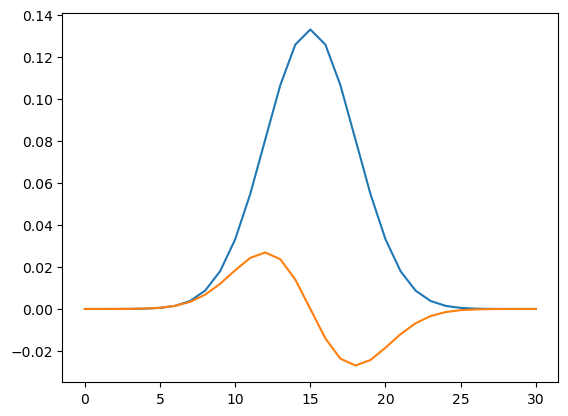

In [8]:
def gaussian1DKernel(sigma: int, length: int = 5):
    """
    Generate the 1D gaussian kernel and its derivative
    Args:
        sigma (int): gaussian width
        length (int): length of the Gaussian kernel

    Return:
        g (np.array): gaussian kernel
        gd (np.array): derivative of gaussian kernel, g
    """
    x = np.arange(-np.ceil(length * sigma), np.ceil(length * sigma) + 1)
    constant = 1.0 / (np.sqrt(2 * np.pi) * sigma)
    g = constant * np.exp(-(x**2) / (2 * sigma**2))
    g /= g.sum()
    gd = (-x / sigma**2) * g
    return g, gd


g, gd = gaussian1DKernel(3, 5)
print(g.shape, gd.shape)
plt.plot(g)
plt.plot(gd)

In [9]:
def gaussianSmoothing(im: np.array, sigma: int):
    """
    Generate the gaussian smoothed image and its smoothed derivative in x and y direction
    Args:
        im (np.array): image to be smoothed
        sigma (int): gaussian width

    Return:
        I (np.array): gaussian smoothed image
        Ix (np.array): smoothed derivative of image im in x direction
        Iy (np.array): smoothed derivative of image im in y direction
    """
    g, gd = gaussian1DKernel(sigma)
    I = cv2.sepFilter2D(im, -1, g, g)
    Ix = cv2.sepFilter2D(im, -1, gd, g)
    Iy = cv2.sepFilter2D(im, -1, g, gd)
    return I, Ix, Iy

In [12]:
def scaleSpaced(im: np.array, sigma: int, n: int) -> np.array:
    """
    Returns a list containing the scale space pyrami of original image im.
    Note that this is a simplified version with increasing widths of gaussians but no downsampling
        Args:
            im (np.array): original image 
            sigma (int): standard deviation of gaussian
            n (int): iteration of scale pyramid

        Return:
            im_scales (np.array): list containing the scale space pyramids
    """
    im_scales = []
    for i in range(n):
        sigma_slice = sigma * (2**i)
        im_scale, _, _ = gaussianSmoothing(im, sigma_slice)
        im_scales.append(im_scale)
    return np.array(im_scales)

In [ ]:
sigma = 2
n_scales = 7
im_scales = scaleSpaced(im, sigma, n_scales)
im_scales.shape

(7, 660, 1066)

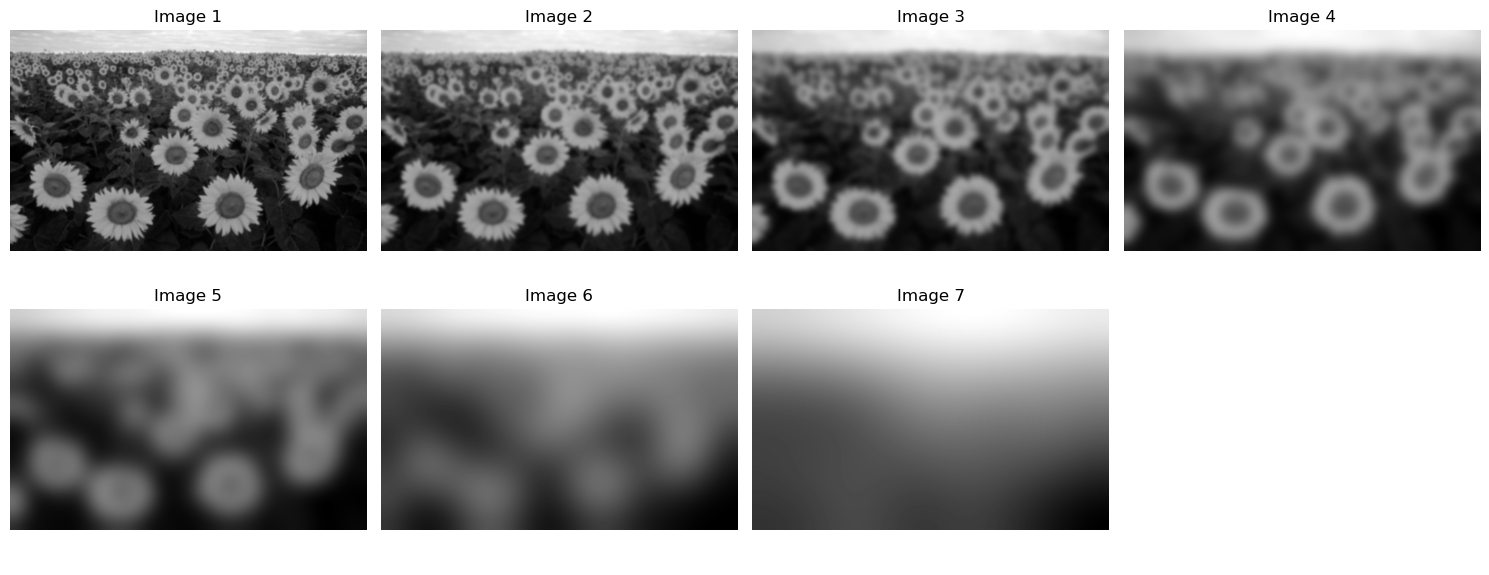

In [17]:
fig, axes = plt.subplots(2, 4, figsize=(15, 6))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

for i in range(7):
    axes[i].imshow(im_scales[i], cmap="gray")  # Use 'gray' for grayscale images
    axes[i].axis("off")  # Hide axes
    axes[i].set_title(f"Image {i+1}")

# Hide the extra subplot (since we have 7 images but 8 slots)
axes[7].axis("off")

plt.tight_layout()
plt.show()

## Ex 8.2

In [ ]:
def differenceOfGaussians(im: np.array, sigma: int, n: int):
    """
    Returns a list of scale space DoGs of the original image im
        Args:
            im (np.array): original image
            sigma (int): standard deviation of gaussian
            n (int): iteration of scale pyramid

        Return:
            DoG (np.array): list of scale space DoGs of the original image im
    """
    im_scales = scaleSpaced(im, sigma, n_scales)